## New Visualizations

In [1]:
import hddm
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy

### Generate some Data

In [25]:
# Metadata
nmcmc = 2000
model = "angle"
n_samples = 1000
includes = hddm.simulators.model_config[model]["hddm_include"]

In [26]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(
    n_subjects=5,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [27]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.590851,0.0,0,-1.704336,0.917225,0.612362,0.898857,0.251476
1,1.784849,0.0,0,-1.704336,0.917225,0.612362,0.898857,0.251476
2,1.927849,0.0,0,-1.704336,0.917225,0.612362,0.898857,0.251476
3,1.390854,0.0,0,-1.704336,0.917225,0.612362,0.898857,0.251476
4,1.839848,0.0,0,-1.704336,0.917225,0.612362,0.898857,0.251476
...,...,...,...,...,...,...,...,...
4995,1.441180,0.0,4,-1.314454,1.491856,0.488526,0.915183,0.119143
4996,1.239182,0.0,4,-1.314454,1.491856,0.488526,0.915183,0.119143
4997,1.708176,0.0,4,-1.314454,1.491856,0.488526,0.915183,0.119143
4998,1.447180,0.0,4,-1.314454,1.491856,0.488526,0.915183,0.119143


In [28]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(
    data, informative=False, include=includes, p_outlier=0.0, model=model
)

In [29]:
# Sample
hddmnn_model.sample(nmcmc, burn=100)

 [-----------------100%-----------------] 2000 of 2000 complete in 450.8 sec

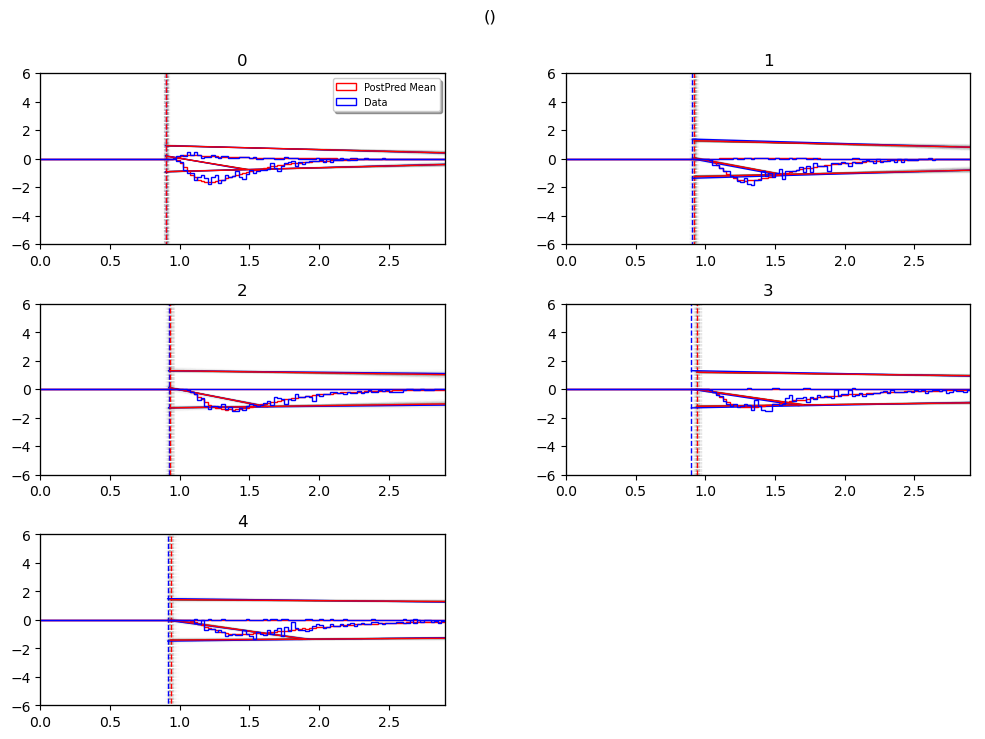

In [31]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(12, 8),
    value_range=np.arange(0, 3, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    parameter_recovery_mode=True,
    **{
        "add_legend": False,
        "alpha": 0.01,
        "ylim": 6.0,
        "bin_size": 0.025,
        "add_posterior_mean_model": True,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_model": True,
        "add_posterior_uncertainty_rts": False,
        "samples": 200,
        "legend_fontsize": 7,
        "legend_loc": "upper left",
        "linewidth_histogram": 1.0,
        "subplots_adjust": {"top": 0.9, "hspace": 0.35, "wspace": 0.3},
    }
)

### `caterpillar plot`

The `caterpillar_plot()` function below displays *parameterwise*, 

-  as a <span style="color:blue"> **blue** </span> tick-mark the **ground truth**.
-  as a *thin* **black** line the $1 - 99$ percentile range of the posterior distribution
-  as a *thick* **black** line the $5-95$ percentile range of the posterior distribution

Again use the ```help()``` function to learn more.

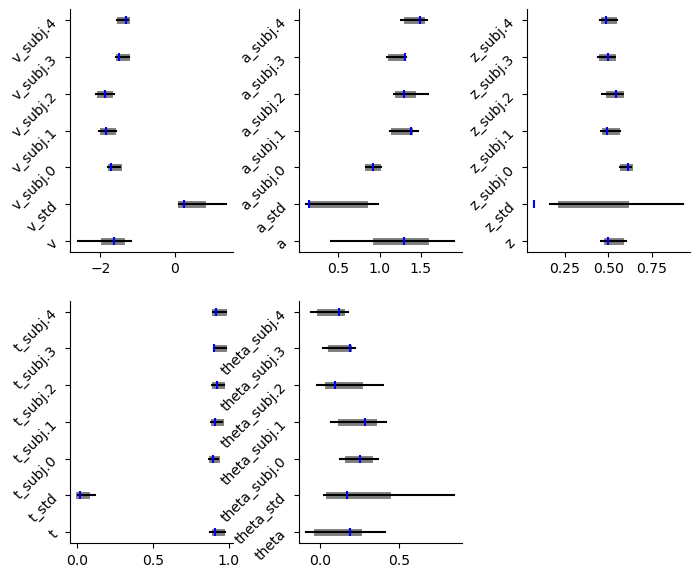

In [32]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(
    hddm_model=hddmnn_model,
    ground_truth_parameter_dict=full_parameter_dict,
    drop_sd=False,
    figsize=(8, 6),
)

### `posterior predictive` (standard)

We have two versions of the *standard posterior predictive plots*. Both are called via the `plot_posterior_predictive` function, however you pick the `plot_func` argument accordingly. 

If you pick `hddm.plotting.plot_func_posterior_pdf_node_nn`, the resulting plot uses likelihood *pdf* evaluations to show you the posterior predictive including uncertainty.

If you pick `hddm.plotting.plot_func_posterior_pdf_node_from_sim`, the posterior predictives instead derive from actual simulation runs from the model.

Both function have a number of options to customize styling.

Below we illustrate:

#### `_plot_func_posterior_pdf_node_nn`

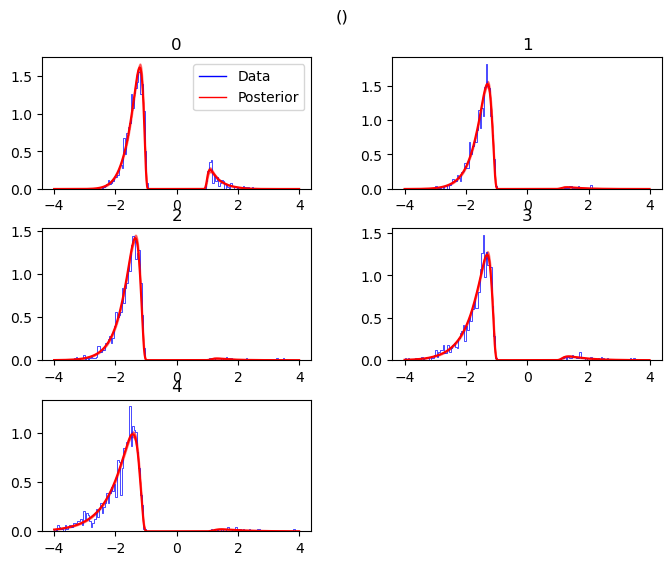

In [34]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(-4, 4, 0.01),
    plot_func=hddm.plotting._plot_func_posterior_pdf_node_nn,
    parameter_recovery_mode=True,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.05,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": True,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
    }
)
plt.show()

#### `_plot_func_posterior_node_from_sim`

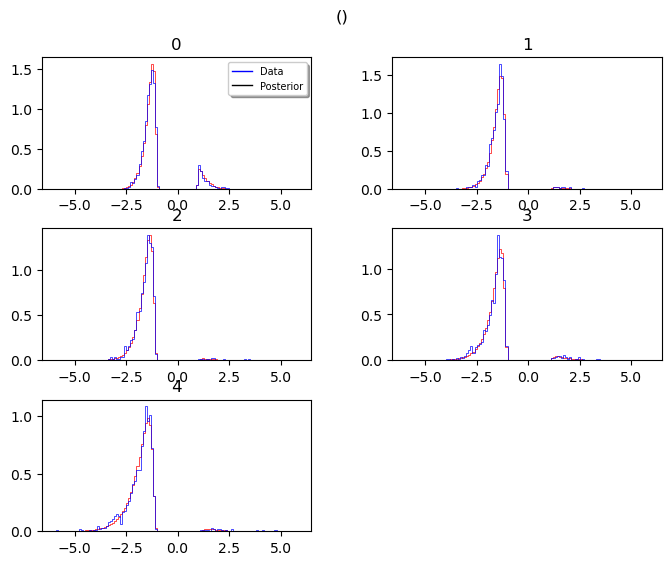

In [35]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(-6, 6, 0.02),
    plot_func=hddm.plotting._plot_func_posterior_node_from_sim,
    parameter_recovery_mode=True,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.1,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": False,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
    }
)

### `posterior predictive` (model cartoon)

The **model plot** is useful to illustrate the behavior of a models pictorially,
including the uncertainty over model parameters embedded in the posterior distribution.

This plot works only for **2-choice** models at this point.

Check out more of it's capabilities with the `help()` function.

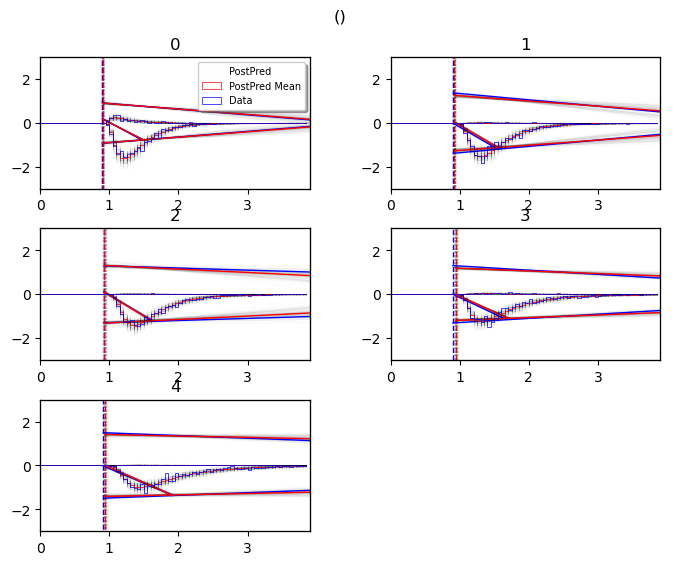

In [33]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(0, 4, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    parameter_recovery_mode=True,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "add_posterior_mean_model": True,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_model": True,
        "add_posterior_uncertainty_rts": True,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
    }
)
plt.show()

### `posterior pair plot`

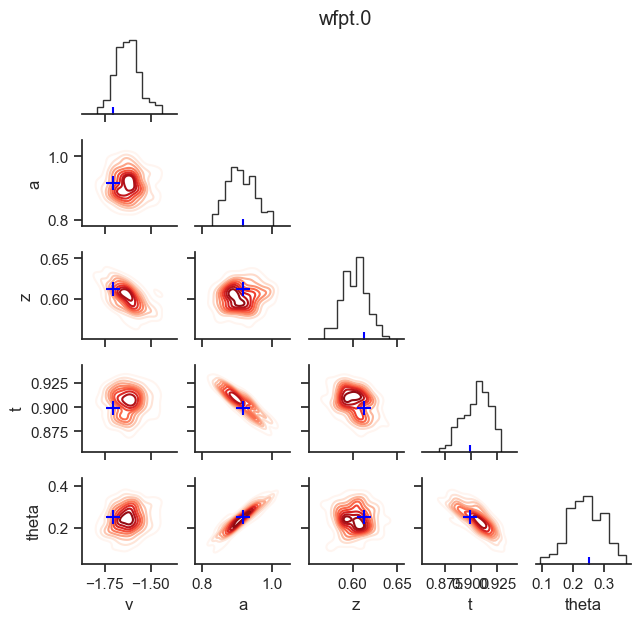

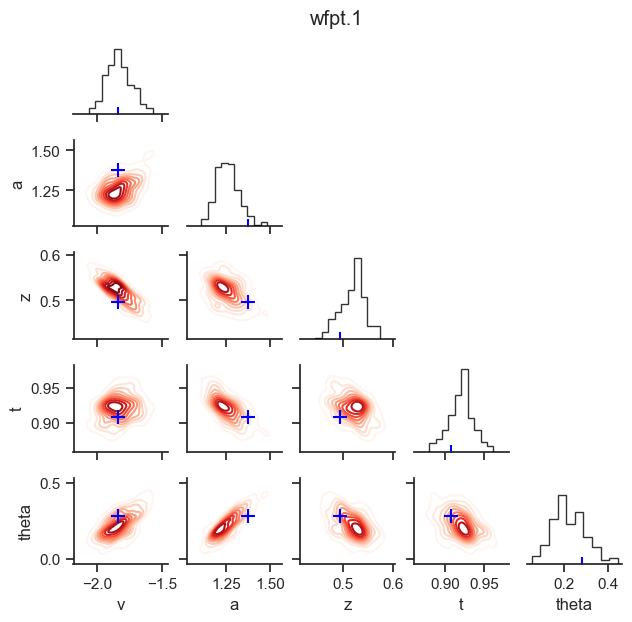

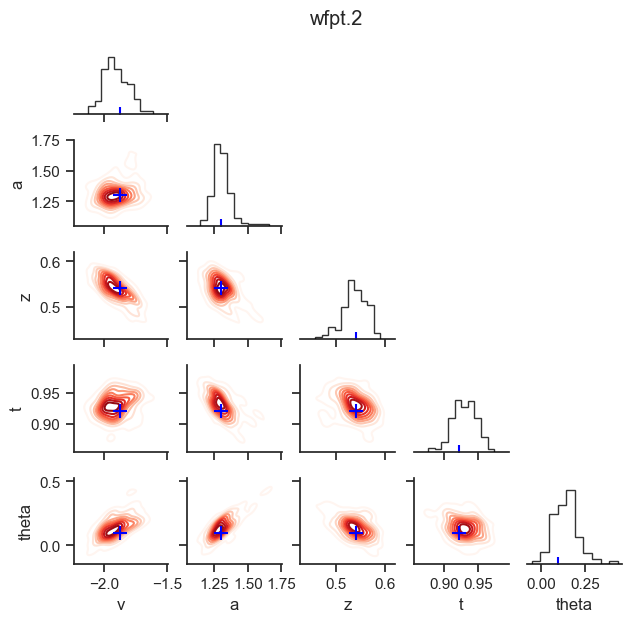

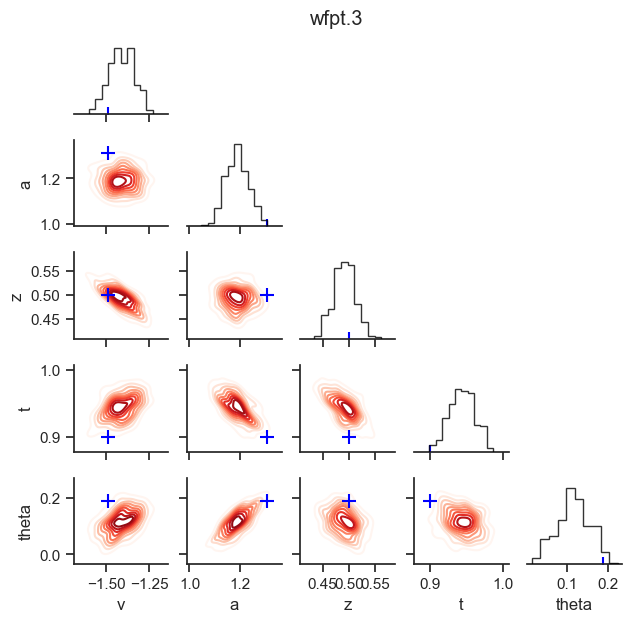

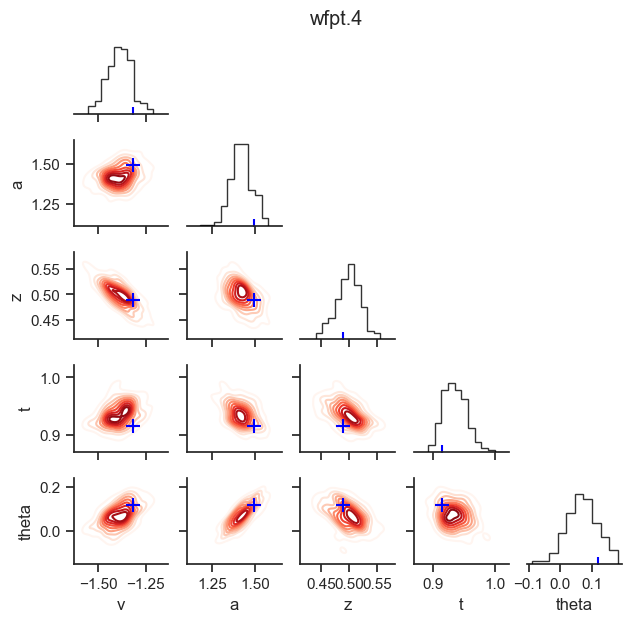

In [36]:
hddm.plotting.plot_posterior_pair(
    hddmnn_model, save=False, parameter_recovery_mode=True, samples=200, figsize=(6, 6)
)

### NEW (v0.9.3): Plots for $n>2$ choice models

In [2]:
# Metadata
nmcmc = 1000
model = "race_no_bias_angle_4"
n_samples = 1000
includes = deepcopy(hddm.simulators.model_config[model]["hddm_include"])
includes.remove("z")

In [3]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(
    n_subjects=5,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=["z"],
)

In [4]:
data

,rt,response,subj_idx,v0,v1,v2,v3,a,z,t,theta
0,1.723548,1.0,0,0.973732,2.066200,0.541262,1.266078,1.988639,0.5,1.559548,0.656266
1,1.784549,2.0,0,0.973732,2.066200,0.541262,1.266078,1.988639,0.5,1.559548,0.656266
2,2.076545,3.0,0,0.973732,2.066200,0.541262,1.266078,1.988639,0.5,1.559548,0.656266
3,1.811549,3.0,0,0.973732,2.066200,0.541262,1.266078,1.988639,0.5,1.559548,0.656266
4,1.748549,3.0,0,0.973732,2.066200,0.541262,1.266078,1.988639,0.5,1.559548,0.656266
...,...,...,...,...,...,...,...,...,...,...,...
4995,1.931315,1.0,4,0.622314,1.956002,0.706355,1.264215,2.106691,0.5,1.569316,0.661371
4996,1.851316,1.0,4,0.622314,1.956002,0.706355,1.264215,2.106691,0.5,1.569316,0.661371
4997,1.910315,3.0,4,0.622314,1.956002,0.706355,1.264215,2.106691,0.5,1.569316,0.661371
4998,1.751316,1.0,4,0.622314,1.956002,0.706355,1.264215,2.106691,0.5,1.569316,0.661371


In [5]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(
    data, informative=False, include=includes, p_outlier=0.0, model=model
)

In [6]:
# Sample
hddmnn_model.sample(nmcmc, burn=100)

 [-----------------100%-----------------] 1001 of 1000 complete in 475.6 sec

#### `caterpillar plot`

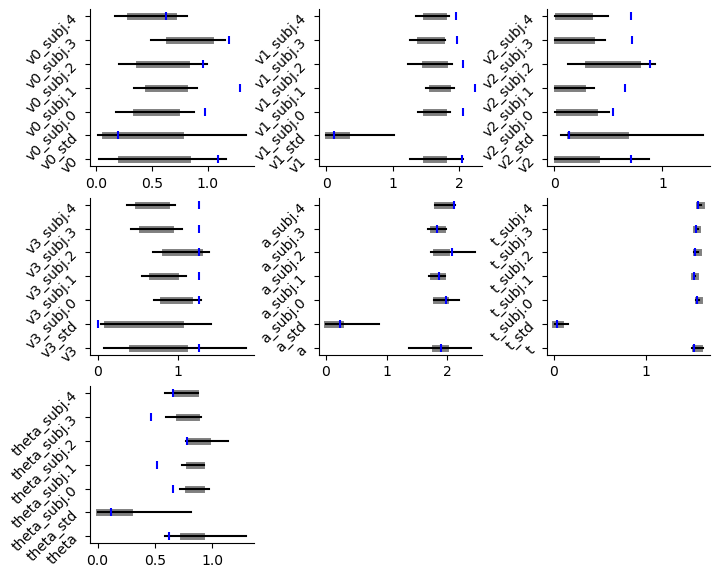

In [7]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(
    hddm_model=hddmnn_model,
    ground_truth_parameter_dict=full_parameter_dict,
    drop_sd=False,
    figsize=(8, 6),
)
plt.show()

#### `posterior_predictive_plot`

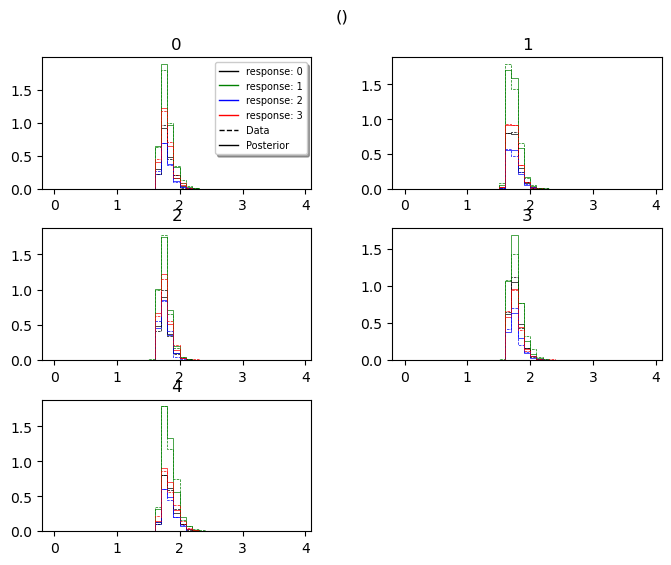

In [9]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(0, 4, 0.02),
    plot_func=hddm.plotting._plot_func_posterior_node_from_sim,
    parameter_recovery_mode=True,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.1,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": False,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
    }
)

#### `model_cartoon_plot`

**WARNING:** The plot below should not be taken as representative for a particular model fit. The chain may need to be run for much longer than the number of samples allotted in this tutorial script.

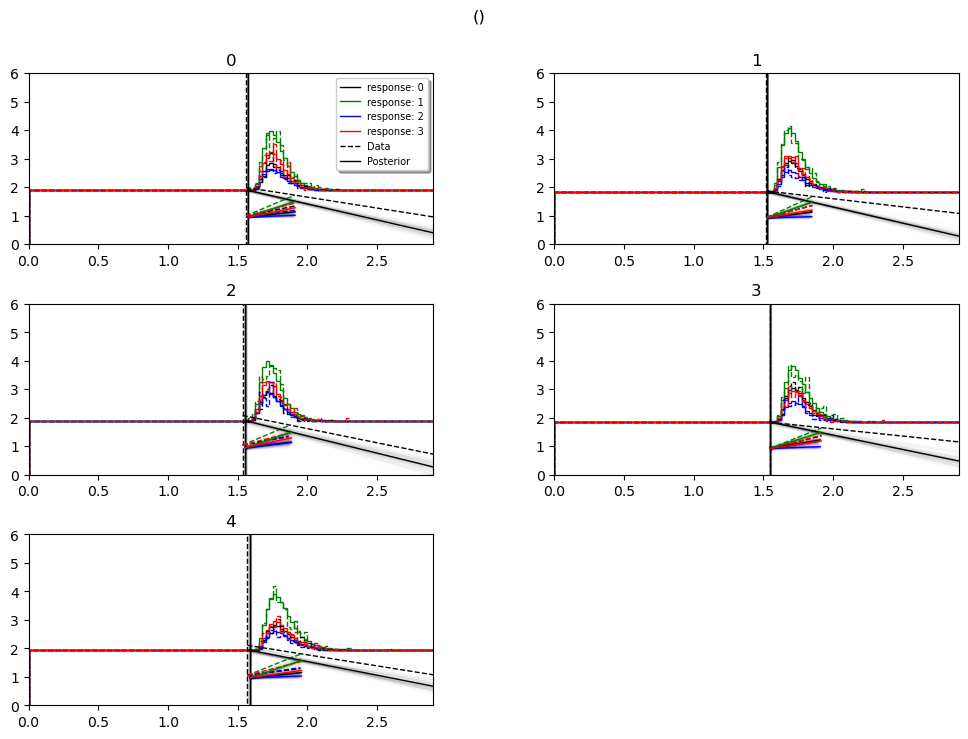

In [10]:
hddm.plotting.plot_posterior_predictive(
    model=hddmnn_model,
    columns=2,  # groupby = ['subj_idx'],
    figsize=(12, 8),
    value_range=np.arange(0, 3, 0.1),
    plot_func=hddm.plotting._plot_func_model_n,
    parameter_recovery_mode=True,
    **{
        "add_legend": False,
        "alpha": 0.01,
        "ylim": 6.0,
        "bin_size": 0.025,
        "add_posterior_mean_model": True,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_model": True,
        "add_posterior_uncertainty_rts": False,
        "samples": 200,
        "legend_fontsize": 7,
        "legend_loc": "upper left",
        "linewidth_histogram": 1.0,
        "subplots_adjust": {"top": 0.9, "hspace": 0.35, "wspace": 0.3},
    }
)
plt.show()